In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Background**

This research studies the relationship between customer retention (customer churn) and other factors. The sample dataset was used for conducting qantitative researches for possible explanations of customer retention, as well as making maching learning prediction models for predicting customer retention rate.

Customer retention is an important concept in marketing researches. Overall, factors like consumer satisfaction, usage behavior, switching costs, coustomer characteristics, marketing responses, and social connectivity are being recognized as predictors.(Ascarza, E. et.al, 2018) However, Based on different dataset and industries, there's different predictors used for predicting customer retention rate. 

The thought structure of identifying and managing customer retention can be described as a series of questions about the retention campaign. Questions includes who is at risk, why at risk, who to target, when to target, with what incentive, and what was gained. (Ascarza, E. et.al, 2018)

Our research find the best predictors and models to solve "Who is at risk" based on our data.


Citation: Ascarza, E., Neslin, S. A., Netzer, O., Anderson, Z., Fader, P. S., Gupta, S., . . . Schrift, R. (2018). In pursuit of enhanced customer retention management: Review, key issues, and future directions. Customer Needs and Solutions, 5(1-2), 65-81. doi:https://doi.org/10.1007/s40547-017-0080-0


**Import package**

In [2]:
import os
import pandas as pd
from pandas import DataFrame
import tensorflow as tf
import keras as kr
import sklearn 
from sklearn import metrics 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**Read Dataset**

In [3]:
dta = pd.read_csv("/kaggle/input/bank-customers/Churn Modeling.csv")

In [4]:
dta

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
#data transformation
dta['Gender'] = dta['Gender'].replace({"Female":0,"Male":1})
dta['Geography'] = dta['Geography'].replace({"France":0,"Spain":1,"Germany":2})

In [6]:
features = dta.drop(axis=1,columns=["RowNumber","CustomerId","Surname"])

**Exploratory Data Analysis**

In [7]:
DataFrame.info(dta)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  int64  
 5   Gender           10000 non-null  int64  
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [8]:
DataFrame.nunique(dta)

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
dta.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [11]:
DataFrame.nunique(features)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

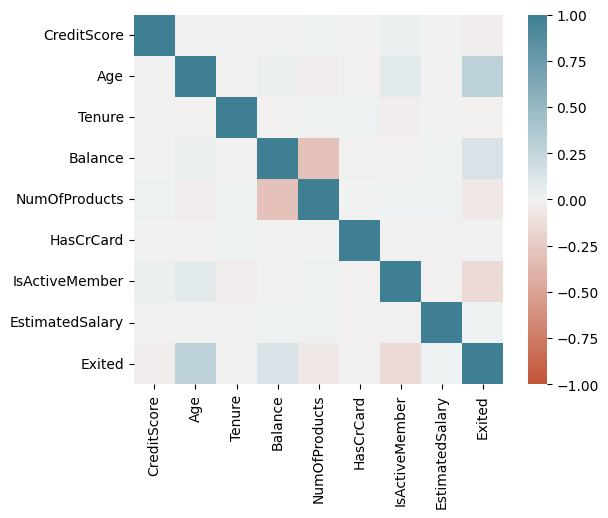

In [12]:
corr=dta.drop(axis=1,columns=["RowNumber","CustomerId","Surname","Geography","Gender"]).corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


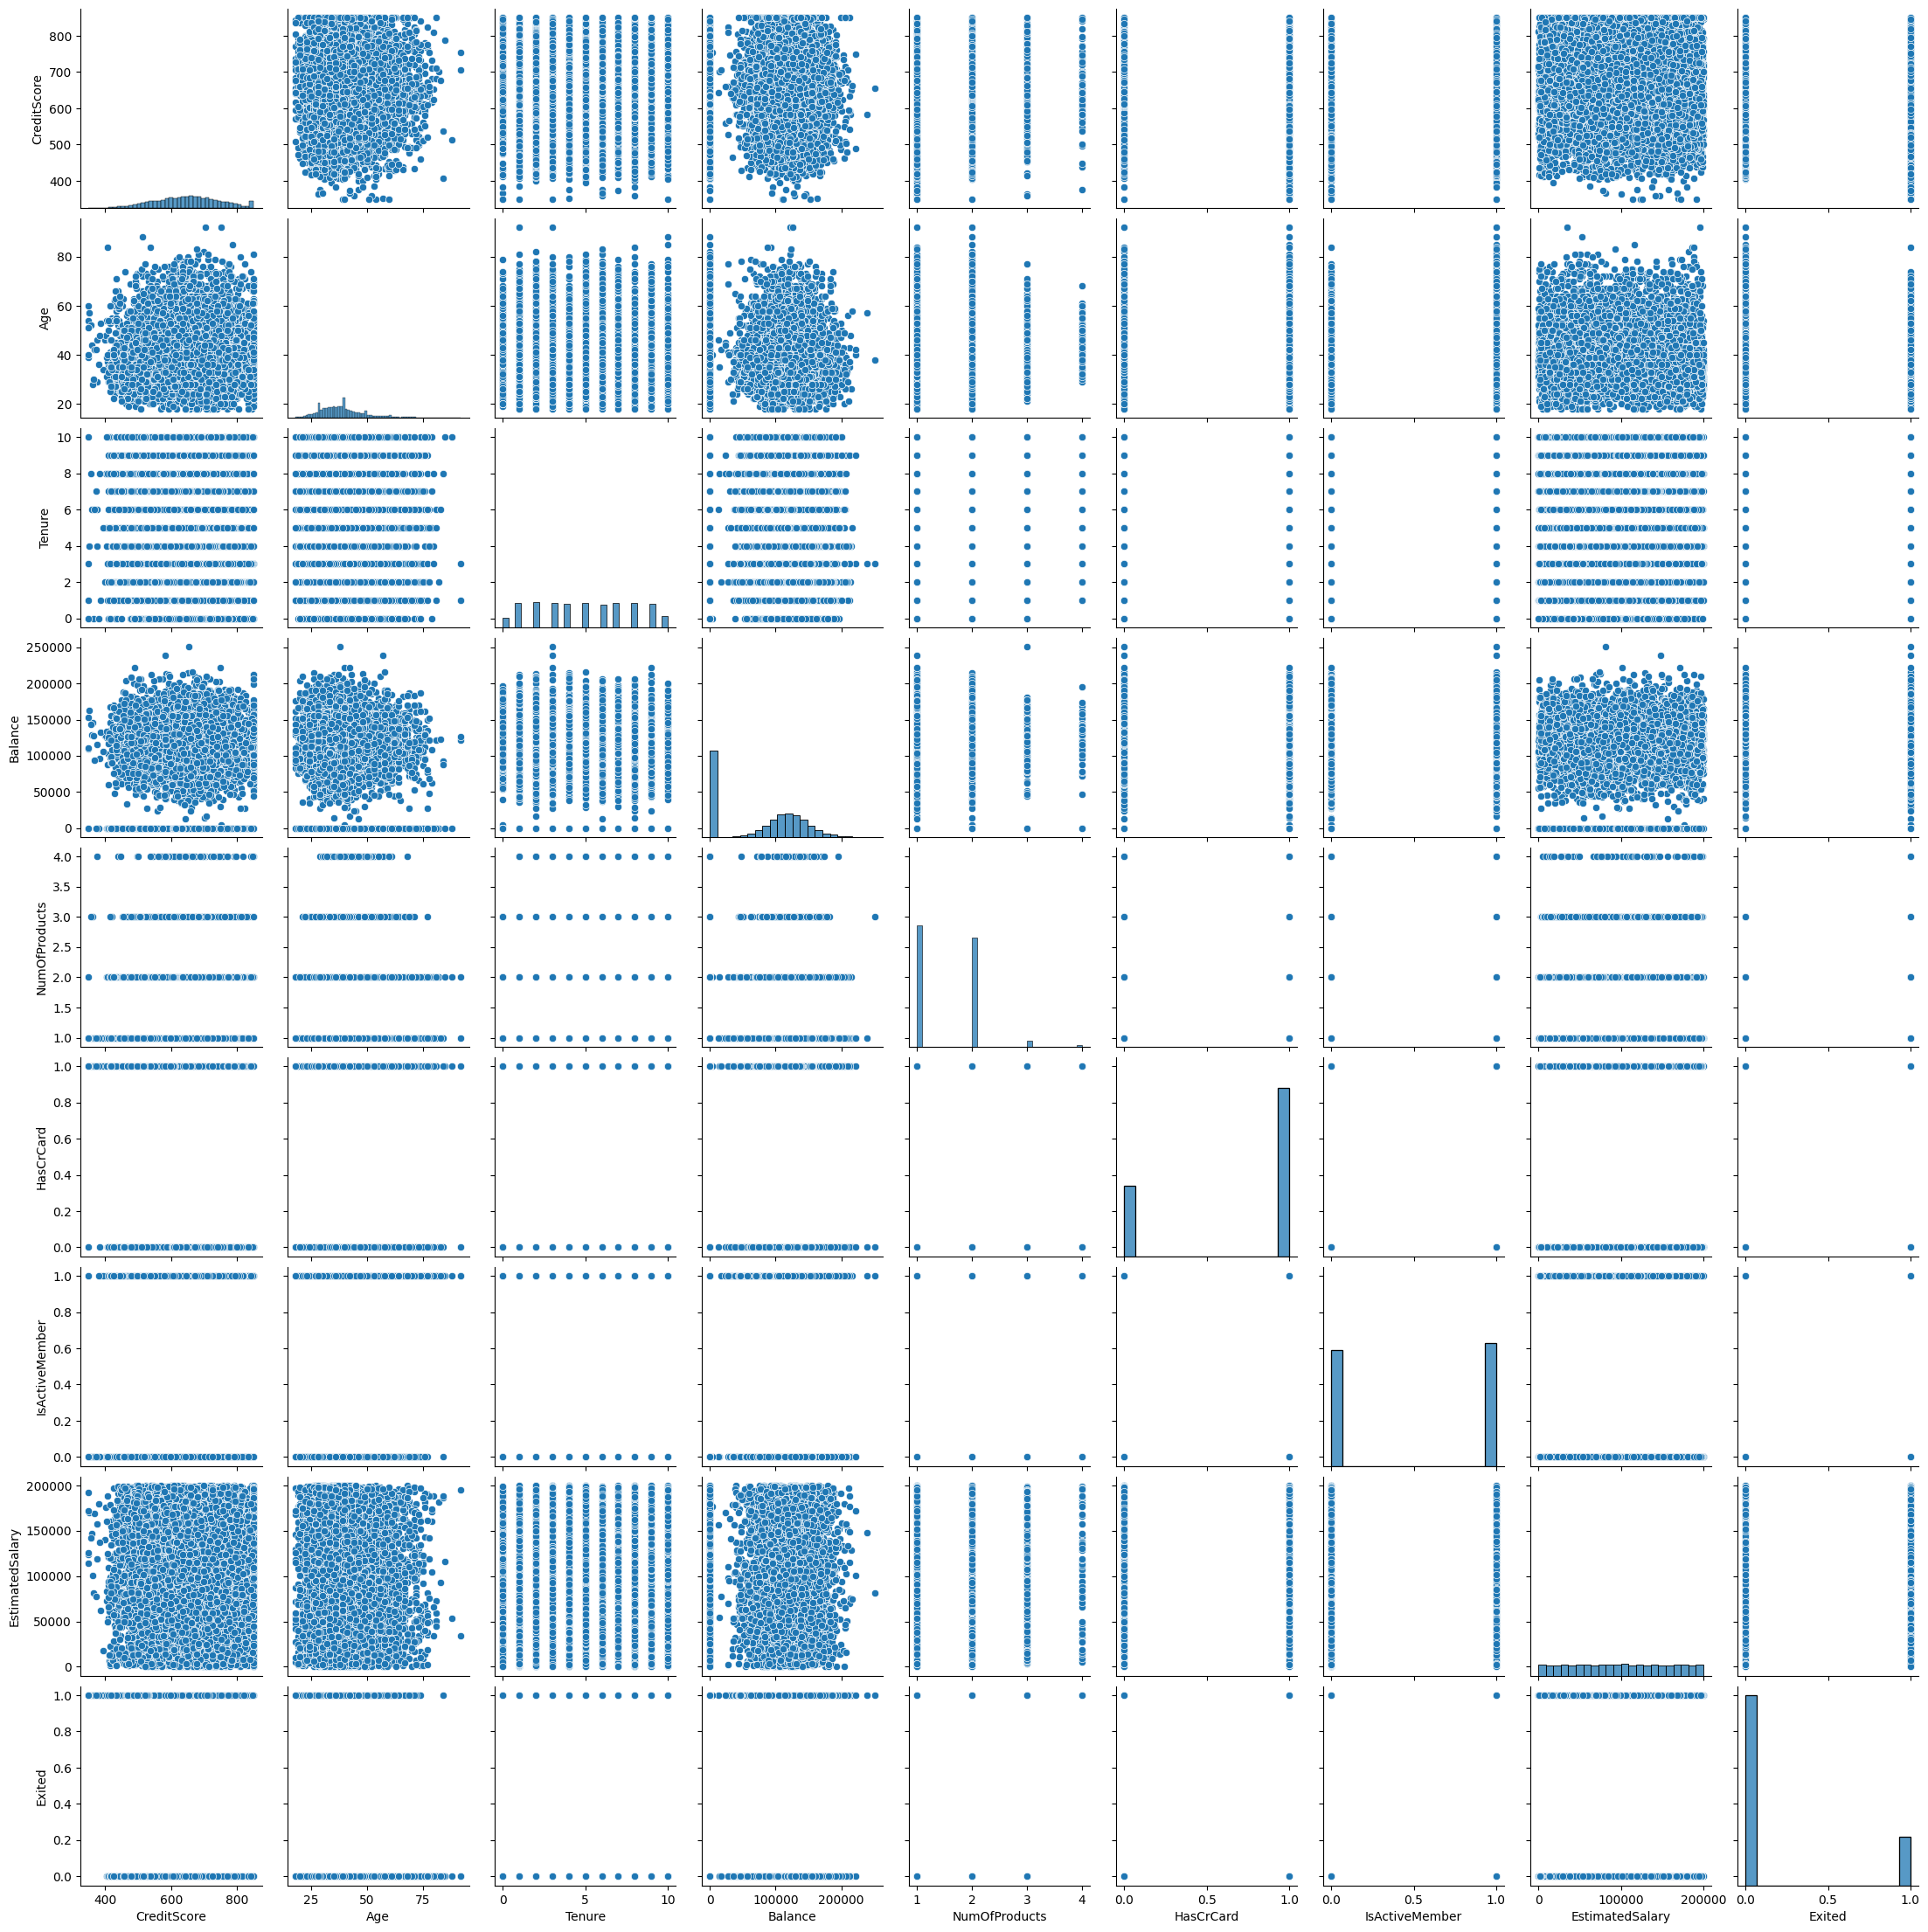

In [13]:
# Basic correlogram
sns.pairplot(dta.drop(axis=1,columns=["RowNumber","CustomerId","Surname","Geography","Gender"]))
plt.show()

**Logistic Regression**

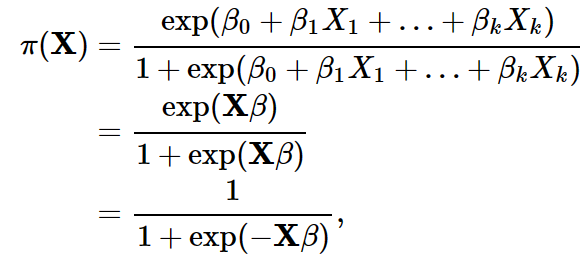This section involves performing binary logistic regression, since Y= exited , with 0 as customer stays or 1 as customer exited.

The formulas of logistic regression:

P(Y=1|X):

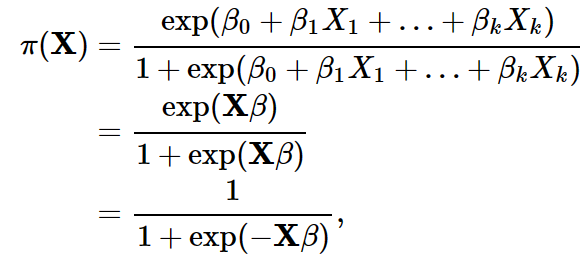

where π(X)= P(Y=1|X)

Likelihood Function:

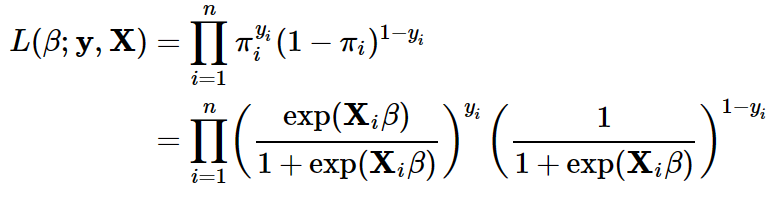

Log Likelihood Function(logit):

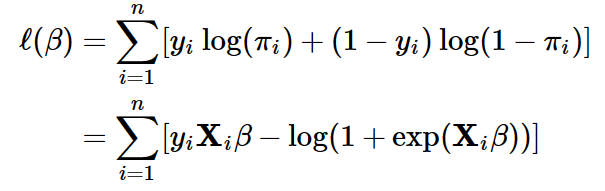

(https://online.stat.psu.edu/stat462/node/207/, Logistic Regression | STAT 462)






The assumptions of logisitc regression to be tested:

1. linearity between log likelihood and independent variables.
2. no influential outliers
3. no multicolinearity
4. independence between observations
5. sufficient sample size

In [14]:
# Wrangling Dataset
features2 = pd.concat([features,pd.get_dummies(features["Geography"],prefix='Geography',dtype=float)],axis=1)
features2 = features2.iloc[:,[10,0]+list(range(11,14))+list(range(2,10))]

In [15]:
features2.head()

,Exited,CreditScore,Geography_0,Geography_1,Geography_2,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,619,1.0,0.0,0.0,0,42,2,0.00,1,1,1,101348.88
1,0,608,0.0,1.0,0.0,0,41,1,83807.86,1,0,1,112542.58
2,1,502,1.0,0.0,0.0,0,42,8,159660.80,3,1,0,113931.57
3,0,699,1.0,0.0,0.0,0,39,1,0.00,2,0,0,93826.63
4,0,850,0.0,1.0,0.0,0,43,2,125510.82,1,1,1,79084.10


In [16]:
# Building training and testing dataset as a machine learning method
train_dataset = features2.sample(frac=0.75, random_state=1)
test_dataset = features2.drop(train_dataset.index)
x_train, y_train = train_dataset.iloc[:, 1:], train_dataset.iloc[:, 0]
x_test, y_test = test_dataset.iloc[:, 1:], test_dataset.iloc[:, 0]
X = x_train
Y= y_train

In [17]:
X.head()

,CreditScore,Geography_0,Geography_1,Geography_2,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,550,1.0,0.0,0.0,1,47,2,0.00,2,1,1,97057.28
3850,680,1.0,0.0,0.0,1,34,3,143292.95,1,1,0,66526.01
4962,531,1.0,0.0,0.0,0,42,2,0.00,2,0,1,90537.47
3886,710,0.0,0.0,1.0,1,34,8,147833.30,2,0,1,1561.58
5437,543,0.0,0.0,1.0,1,30,6,73481.05,1,1,1,176692.65


**Building Log regression model**

In [18]:
import statsmodels
from statsmodels.genmod import families
from statsmodels.genmod.generalized_linear_model import GLM

In [19]:
X

,CreditScore,Geography_0,Geography_1,Geography_2,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,550,1.0,0.0,0.0,1,47,2,0.00,2,1,1,97057.28
3850,680,1.0,0.0,0.0,1,34,3,143292.95,1,1,0,66526.01
4962,531,1.0,0.0,0.0,0,42,2,0.00,2,0,1,90537.47
3886,710,0.0,0.0,1.0,1,34,8,147833.30,2,0,1,1561.58
5437,543,0.0,0.0,1.0,1,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...,...,...
7118,715,1.0,0.0,0.0,1,32,8,175307.32,1,1,0,187051.23
7414,737,0.0,0.0,1.0,0,45,2,99169.67,2,1,1,78650.95
1196,718,0.0,0.0,1.0,1,28,4,65643.30,1,1,0,28760.99
7632,736,1.0,0.0,0.0,1,43,4,202443.47,1,1,0,72375.03


In [20]:
# Select features for log regression
# X3=X.iloc[:,[0,5,6,7,8,11]]

In [21]:
logit_results = GLM(Y, X, family=families.Binomial()).fit()
print(logit_results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Exited   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7488
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3205.9
Date:                Sun, 05 Nov 2023   Deviance:                       6411.8
Time:                        18:32:23   Pearson chi2:                 7.68e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1483
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0007      0.000     

**Testing Log Regression Assumptions**

In [22]:
# I used training data to test assumptions for log regression model

In [23]:
# Testing Linearity Assumption
predicted = logit_results.predict(X)
# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# # Visualize predictor variable vs logit values for Age
# plt.scatter(x=X_constant['Fare'].values, y=log_odds)
# plt.xlabel("Fare")
# plt.ylabel("Log-odds")
# plt.show()

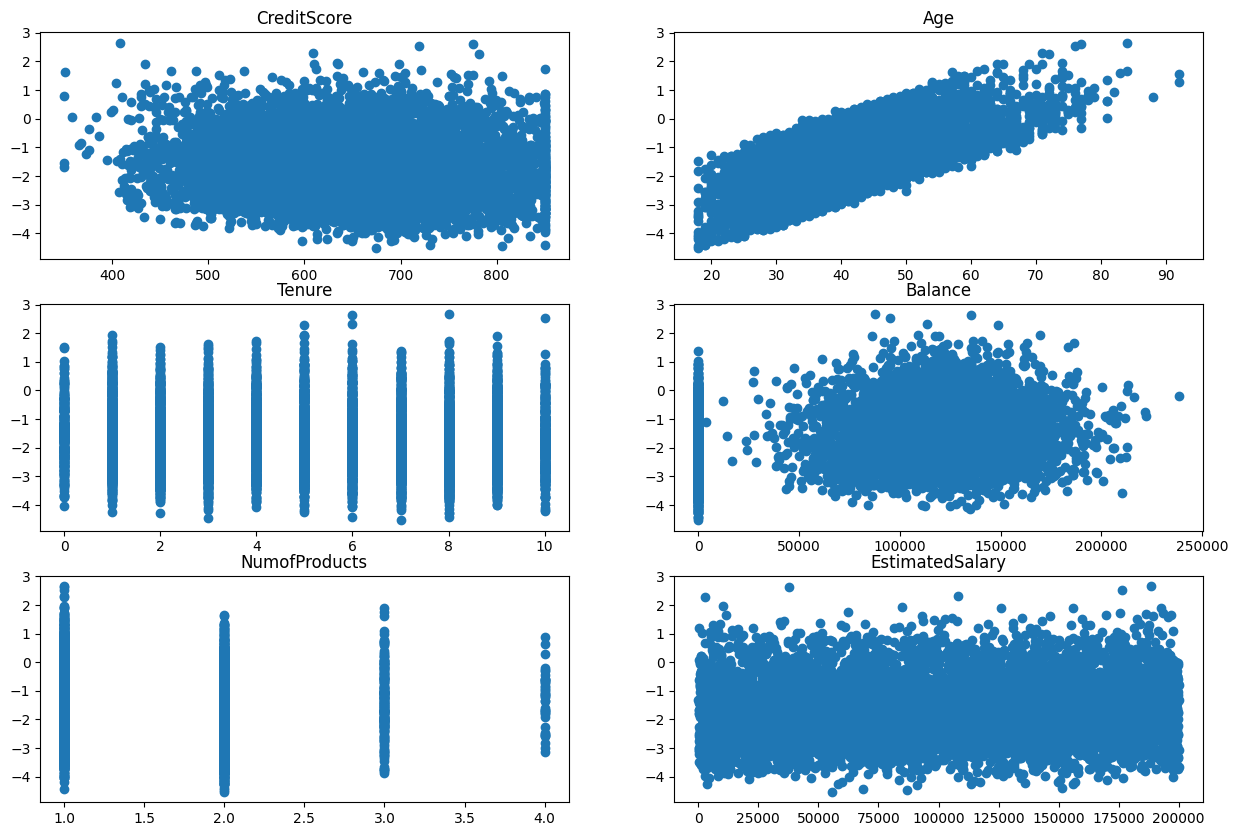

In [24]:
plt.rcParams['figure.figsize']=(15,10)
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2)
ax1.scatter(X['CreditScore'].values,log_odds)
ax1.title.set_text('CreditScore')
ax2.scatter(X['Age'].values,log_odds)
ax2.title.set_text('Age')
ax3.scatter(X['Tenure'].values,log_odds)
ax3.title.set_text('Tenure')
ax4.scatter(X['Balance'].values,log_odds)
ax4.title.set_text('Balance')
ax5.scatter(X['NumOfProducts'].values,log_odds)
ax5.title.set_text('NumofProducts')
ax6.scatter(X['EstimatedSalary'].values,log_odds)
ax6.title.set_text('EstimatedSalary')
plt.show()
#plt.scatter(X['CreditScore'].values,log_odds)

In [25]:
#Box-Tidwell Test

In [26]:
# Define continuous variables
X2=X.iloc[:,[0,5,6,7,8,11]]
len(X2)

7500

In [27]:
# Box Tidwell only works for positive values. Hence, drop values where x = 0
for i in list(X2): 
    X2 = X2.drop(X2[X2[i] == 0].index)
len(X2)

4596

In [28]:
# Inclusion of interaction term (logit transform) as part of Box-Tidwell test
for var in X2:
    X2[f'{var}:Log_{var}'] = X2[var].apply(lambda x: x * np.log(x)) #np.log = natural 


In [29]:
X2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4596 entries, 3850 to 4566
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CreditScore                          4596 non-null   int64  
 1   Age                                  4596 non-null   int64  
 2   Tenure                               4596 non-null   int64  
 3   Balance                              4596 non-null   float64
 4   NumOfProducts                        4596 non-null   int64  
 5   EstimatedSalary                      4596 non-null   float64
 6   CreditScore:Log_CreditScore          4596 non-null   float64
 7   Age:Log_Age                          4596 non-null   float64
 8   Tenure:Log_Tenure                    4596 non-null   float64
 9   Balance:Log_Balance                  4596 non-null   float64
 10  NumOfProducts:Log_NumOfProducts      4596 non-null   float64
 11  EstimatedSalary:Log_EstimatedSal

In [30]:
# Select Y
Y2 = pd.DataFrame(Y)
Y2 = X2.join(Y2).loc[:,list(Y2)]
#for i in list(X2): 
#    Y2 = Y2.drop(X2[X2[i] == 0].index)

In [31]:
# add a const = 1 to X
X2 = statsmodels.tools.tools.add_constant(X2, prepend=False)

In [32]:
logit_results2 = GLM(Y2, X2, family=families.Binomial()).fit()

In [33]:
# Check if logit transform interation terms is statistically significant
print(logit_results2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Exited   No. Observations:                 4596
Model:                            GLM   Df Residuals:                     4583
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2070.4
Date:                Sun, 05 Nov 2023   Deviance:                       4140.9
Time:                        18:32:27   Pearson chi2:                 5.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1847
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Cr

In [34]:
# The result shows the logit transform interation term of Age, Balance is statistically significant,
# Indicating there's non-linearity in these variables. It's suggested to add other terms to solve non-linearity

In [35]:
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Exited   No. Observations:                 7500
Model:                            GLM   Df Residuals:                     7488
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3205.9
Date:                Sun, 05 Nov 2023   Deviance:                       6411.8
Time:                        18:32:27   Pearson chi2:                 7.68e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1483
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
CreditScore        -0.0007      0.000     

In [36]:
# Testing No Significant Outliers

from scipy import stats

# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook distance
diagnosis_df = summ_df.loc[:,['cooks_d']]

# Append absolute standardized residual values
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df.loc[:,'std_resid'].apply(lambda x: np.abs(x))

# Sort by Cook's Distance
diagnosis_df.sort_values("cooks_d", ascending=False)
diagnosis_df.head()


,cooks_d,std_resid
9953,0.000008,0.334469
3850,0.000016,0.429060
4962,0.000014,0.369988
3886,0.000011,0.318211
5437,0.000009,0.309576


Threshold for Cook Distance = 0.0005333333333333334


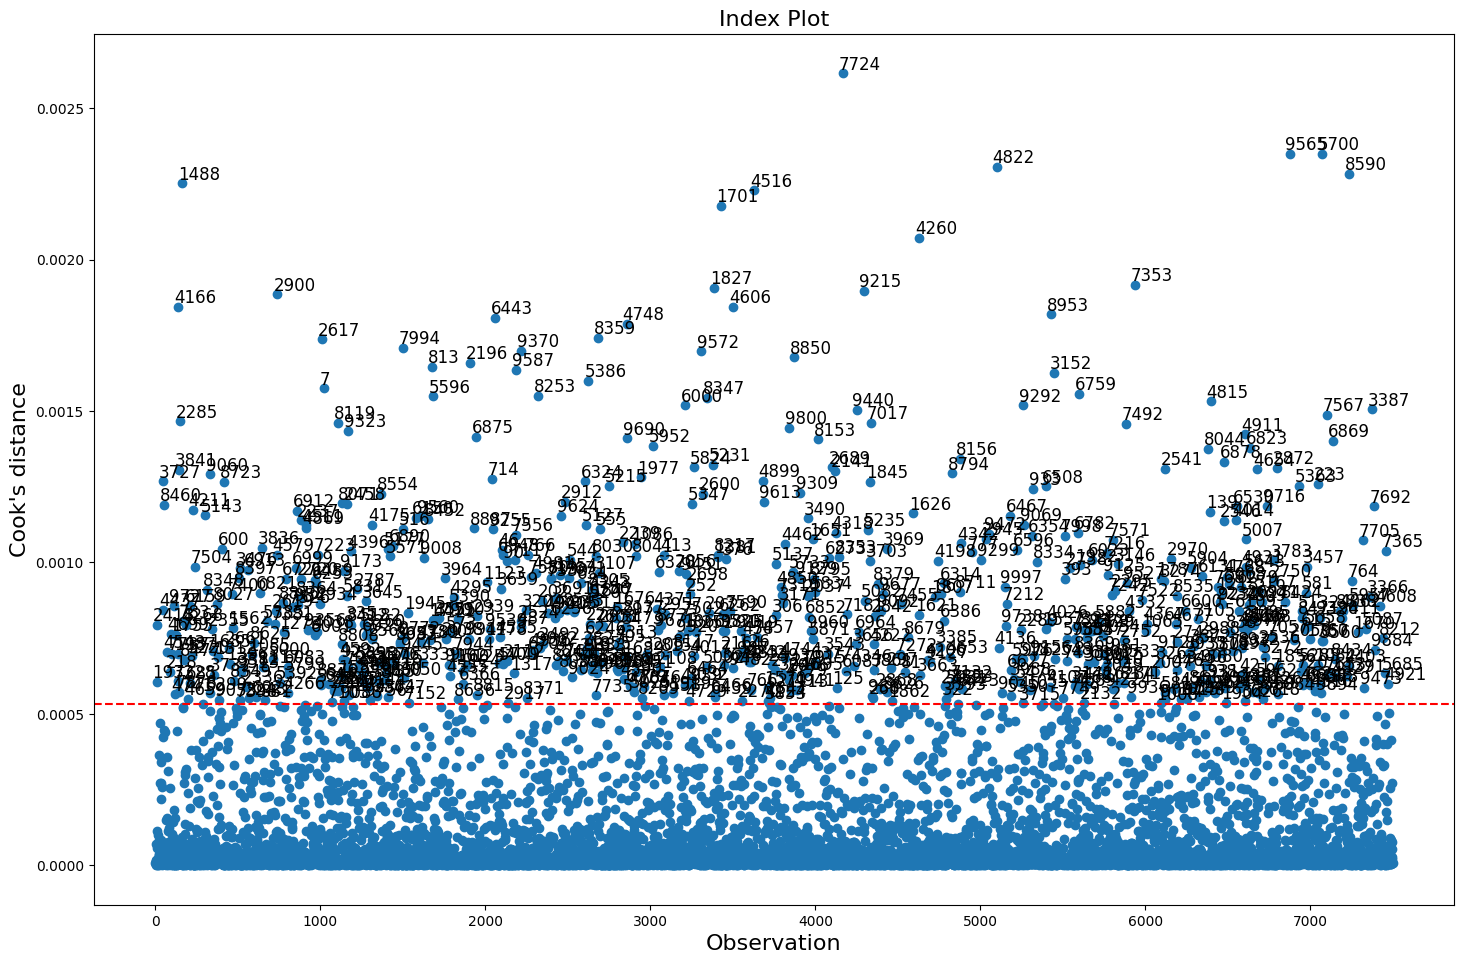

In [37]:
# Set Cook's distance threshold
cook_threshold = 4 / len(train_dataset)
print(f"Threshold for Cook Distance = {cook_threshold}")

# Plot influence measures (Cook's distance)
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y = cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [38]:
# Find number of observations that exceed Cook's distance threshold
outliers = diagnosis_df[diagnosis_df['cooks_d'] > cook_threshold]
prop_outliers = round(100*(len(outliers) / len(train_dataset)),1)
print(f'Proportion of data points that are highly influential = {prop_outliers}%')
     

# Find number of observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]
prop_extreme = round(100*(len(extreme) / len(train_dataset)),1)
     
# Display top 5 most influential outliers
extreme.sort_values("cooks_d", ascending=False).head()
    

Proportion of data points that are highly influential = 8.9%


,cooks_d,std_resid
7724,0.002614,3.587272
5700,0.002350,4.075039
9565,0.002348,3.586235
4822,0.002305,4.753883
8590,0.002282,3.489325


In [39]:
# Deep dive into extreme outlier
train_dataset.loc[[8590]]

,Exited,CreditScore,Geography_0,Geography_1,Geography_2,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8590,1,771,1.0,0.0,0.0,0,41,10,108309.0,4,1,1,137510.41


In [40]:
# The amount of  outliers is around 9%, which is not very high. However, the outliers has a relatively big influence on the model, 
# which indicates maybe scaling (normalization or standardization) of variables like balance and estimated salary may solve the outlier problem. 

In [41]:
# Checking no multicolinearity assumption

def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [statsmodels.stats.outliers_influence.variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(train_dataset)

,variables,VIF
0,Exited,1.185672
1,CreditScore,1.001961
2,Geography_0,40.877144
3,Geography_1,21.249702
4,Geography_2,22.702715
5,Gender,1.012597
6,Age,1.113820
7,Tenure,1.003399
8,Balance,1.340045
9,NumOfProducts,1.126520


In [42]:
# We define a threshold for VIF at 4. VIF>4 means potential colinearity issue
# It shows that dummy coded Geography variables' VIF > 4 which shows 
# introducing Geography may bring multicolinearity issue. However, since Python's statsmodel package calcualte VIF for each variable,
# dummy coded variables would inherently have high multicolinearity with each other. So this issue can be omitted.
# see https://stats.stackexchange.com/questions/430412/vif-for-categorical-variable-with-more-than-2-categories


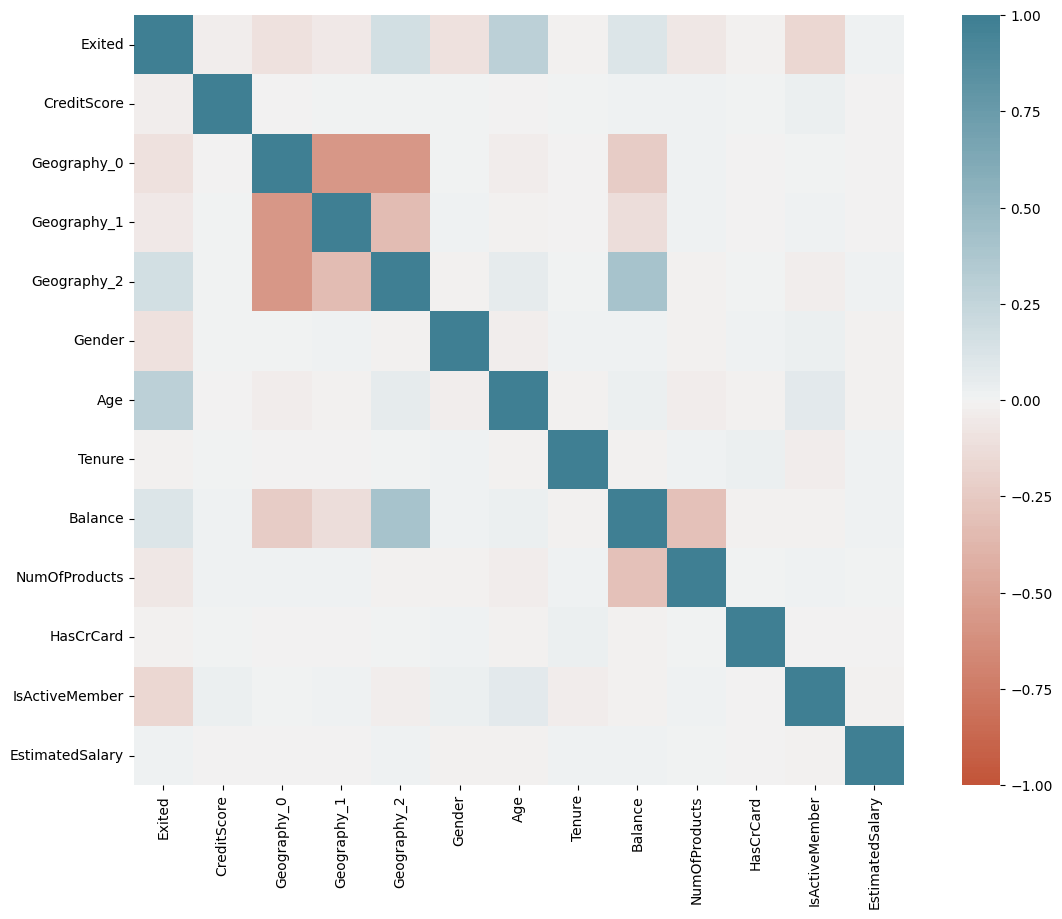

In [43]:
corr=train_dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [44]:
# A simple look at correlation between features shows little multicolinearity except for the dummy coded variables, which is ok

In [45]:
# Check Independence assumption

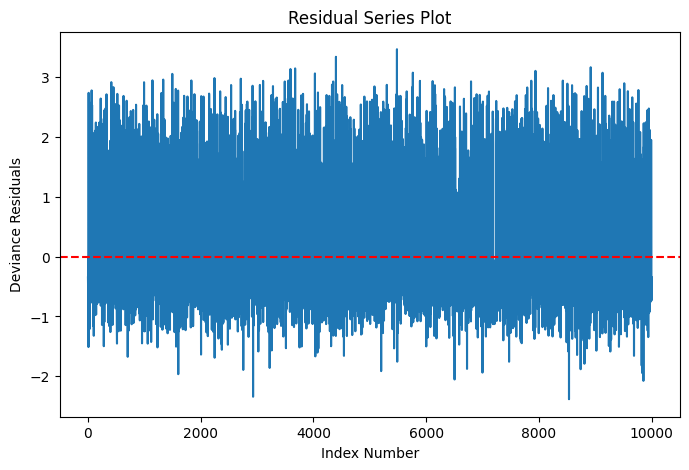

In [46]:
# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals") # 111: for subplots, there's 1 row, 1 column, and it's the first subplot

# Generate residual series plot using standardized deviance residuals
ax.plot(pd.DataFrame.sort_index(train_dataset).index.tolist(), 
        stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red')


# The residuals in the plot above appear to be randomly scattered around the centerline  of zero
# Thus, the assumption of independence ( of errors) is satisfied.

In [47]:
# Check if sample size is sufficiently large
# There should be an adequate number of observations for each independent variable in the dataset to avoid creating an overfit model.

In [48]:
# Find total number of observations
print("Rows in the Dataframe :",len(train_dataset))

print("Categorize wise Distribution")
# Get value counts for independent variables (mainly focus on categorical)
for col in train_dataset.columns.to_list()[1:]:
    #if train_dataset.dtypes[col] == 'uint8': # Keep categorical variables only
        print(train_dataset[col].value_counts())

Rows in the Dataframe : 7500
Categorize wise Distribution
CreditScore
850    174
678     47
667     44
670     42
705     42
      ... 
440      1
431      1
395      1
373      1
399      1
Name: count, Length: 455, dtype: int64
Geography_0
0.0    3769
1.0    3731
Name: count, dtype: int64
Geography_1
0.0    5615
1.0    1885
Name: count, dtype: int64
Geography_2
0.0    5616
1.0    1884
Name: count, dtype: int64
Gender
1    4084
0    3416
Name: count, dtype: int64
Age
37    358
34    344
38    343
35    341
33    337
     ... 
84      2
79      2
88      1
82      1
83      1
Name: count, Length: 68, dtype: int64
Tenure
1     791
2     784
8     774
7     768
5     761
3     755
9     742
4     737
6     724
10    375
0     289
Name: count, dtype: int64
Balance
0.00         2719
130170.82       2
105473.74       2
61211.18        1
106629.49       1
             ... 
125095.94       1
94748.76        1
109960.06       1
43134.65        1
79927.36        1
Name: count, Length: 4780, dty

In [49]:
# We set threshold at >10 observations with least frequent outcome for each independent variable, and a total number of observations >500
# The result seems to be above threshold, thus the assumption is fulfilled

In [50]:
train_dataset

,Exited,CreditScore,Geography_0,Geography_1,Geography_2,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9953,0,550,1.0,0.0,0.0,1,47,2,0.00,2,1,1,97057.28
3850,0,680,1.0,0.0,0.0,1,34,3,143292.95,1,1,0,66526.01
4962,0,531,1.0,0.0,0.0,0,42,2,0.00,2,0,1,90537.47
3886,0,710,0.0,0.0,1.0,1,34,8,147833.30,2,0,1,1561.58
5437,0,543,0.0,0.0,1.0,1,30,6,73481.05,1,1,1,176692.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7118,0,715,1.0,0.0,0.0,1,32,8,175307.32,1,1,0,187051.23
7414,0,737,0.0,0.0,1.0,0,45,2,99169.67,2,1,1,78650.95
1196,0,718,0.0,0.0,1.0,1,28,4,65643.30,1,1,0,28760.99
7632,0,736,1.0,0.0,0.0,1,43,4,202443.47,1,1,0,72375.03


In [51]:
# The method of checking log regression assumptions in python is learned from (https://github.com/sandipanpaul21/Logistic-regression-in-python/blob/main/07_LR_Assumptions.ipynb)

**Evaluating Log regression model performance**

In [52]:
# Evaluation

In [53]:
 #sklearn.linear_model.LogisticRegression

In [54]:
y_pred = logit_results.predict(x_test)
y_pred.loc[ y_pred<0.5] = 0
y_pred.loc[y_pred>=0.5] =1
y_pred

0       0.0
2       0.0
14      0.0
15      0.0
18      0.0
       ... 
9983    0.0
9986    0.0
9989    0.0
9992    0.0
9995    0.0
Length: 2500, dtype: float64

In [55]:
y_test

0       1
2       1
14      0
15      0
18      0
       ..
9983    0
9986    0
9989    0
9992    0
9995    0
Name: Exited, Length: 2500, dtype: int64

In [56]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.808

**Model Building in tensorflow or sklearn**

In [57]:
#tf.print(y_train)

In [58]:
#tf.print(x_train)

In [59]:
#len(train_dataset)

In [60]:
#len(test_dataset)

In [61]:
# x_train, y_train = tf.convert_to_tensor(x_train, dtype=tf.float32), tf.convert_to_tensor(y_train, dtype=tf.float32)
# x_test, y_test = tf.convert_to_tensor(x_test, dtype=tf.float32), tf.convert_to_tensor(y_test, dtype=tf.float32)

In [62]:
#Testing Assumptions

#Use seaborn.pairplot to review the joint distribution of a few pairs of mean-based features from the training set and observe how they relate to the target:
#sns.pairplot(train_dataset.iloc[:, 1:], hue = 'diagnosis', diag_kind='kde');

#Given the inconsistent ranges, it is beneficial to standardize the data such that each feature has a zero mean and unit variance. This process is called normalization

# Log regression with tensorflow is learned from (https://www.tensorflow.org/guide/core/logistic_regression_core)

In [63]:
#train_dataset.describe().transpose()[:10]

**Extensions: Other Machine Learning Methods Prediction**

**CART**

In [64]:

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation




In [65]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# # load dataset
# pima = pd.read_csv("diabetes.csv", header=None, names=col_names)
# pima.head()


In [66]:
# #split dataset in features and target variable
# feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
# X = pima[feature_cols] # Features
# y = pima.label # Target variable

In [67]:
# # Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Building training and testing dataset as a machine learning method
train_dataset = features.sample(frac=0.75, random_state=1)
test_dataset = features.drop(train_dataset.index)
x_train, y_train = train_dataset.iloc[:, 1:], train_dataset.iloc[:, 0]
x_test, y_test = test_dataset.iloc[:, 1:], test_dataset.iloc[:, 0]

**Build CART Model**

In [68]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


In [69]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.0048


In [70]:
# pip install pydotplus

In [71]:
# from sklearn.tree import export_graphviz
# from six import StringIO 
# from IPython.display import Image  
# import pydotplus

In [72]:


# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph


**Optimizing CART Performance**

change hyperparameters: create and plot a decision tree on the same data with max_depth=3

In [73]:
# #create and plot a decision tree on the same data with max_depth=3
# # Create Decision Tree classifer object
# clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# # Train Decision Tree Classifer
# clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [74]:
# from six import StringIO 
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

In [75]:
# The process of fitting CART in python is learned from (https://www.datacamp.com/tutorial/decision-tree-classification-python)

# you can also see 
# https://towardsdatascience.com/cart-classification-and-regression-trees-for-clean-but-powerful-models-cc89e60b7a85
# https://www.kaggle.com/code/bahaulug/classification-and-regression-tree-cart

**kNN**

**Random Forest**